In [159]:
import pandas as pd
import math
import numpy as np

In [160]:
import zero

In [161]:
from zero.als import MangakiALS

In [162]:
ratings_table = pd.read_csv("ratings.csv")

In [179]:
ratings_table.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [184]:
ratings_table["userId"] = np.unique(ratings_table["userId"], return_inverse=True)[1]
ratings_table["movieId"] = np.unique(ratings_table["movieId"], return_inverse=True)[1]

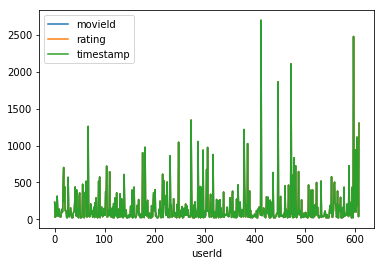

In [185]:
ratings_table.groupby("userId").count().plot()

In [186]:
nb_users = max(ratings_table['userId'])

In [187]:
als = MangakiALS(20)
als.set_parameters(nb_users, nb_works)

In [188]:
ratings_table.groupby("userId").count().loc[1, 'rating']

29

In [189]:
users_sorted = ratings_table.groupby("userId").count().sort_values('rating')

In [190]:
movies_sorted = ratings_table.groupby("movieId").count().sort_values('rating')
movies_sorted_list = movies_sorted.index.to_list()
nb_works = len(movies_sorted_list)

In [191]:
ratings_table.query('userId == 1')

,userId,movieId,rating,timestamp
232,1,277,3.0,1445714835
233,1,291,4.0,1445715029
234,1,1283,4.5,1445715228
235,1,2670,4.0,1445714885
236,1,4607,4.0,1445714952
237,1,5294,3.5,1445714960
238,1,6236,4.0,1445715013
239,1,6298,4.0,1445715064
240,1,6693,4.5,1445715141
241,1,6784,5.0,1445714980


In [192]:
users_sorted_list = users_sorted.index.to_list()
nb_users = len(users_sorted_list)

In [193]:
users_training_set = users_sorted_list[:math.floor(len(users_sorted_list)*0.8)]

In [194]:
users_test_set = users_sorted_list[math.floor(len(users_sorted_list)*0.8) :]

In [195]:
training_ratings_table = ratings_table.query('userId in @users_training_set')

In [196]:
X_test = np.array(training_ratings_table[['userId', 'movieId']])

In [197]:
y_test = training_ratings_table['rating']

In [198]:
als.fit(X_test, y_test)

Computing M: (609 × 9724)
Shapes (609, 20) (20, 9724)
